## Homework-3: MNIST Classification with ConvNet

### **Deadline: 2021.04.06 23:59:00 **

### In this homework, you need to
- #### implement the forward and backward functions for ConvLayer (`layers/conv_layer.py`)
- #### implement the forward and backward functions for PoolingLayer (`layers/pooling_layer.py`)
- #### implement the forward and backward functions for DropoutLayer (`layers/dropout_layer.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [1, 28, 28])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))
x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyperparameters
You can modify hyperparameters by yourself.

In [5]:
batch_size = 100
max_epoch = 10
init_std = 0.01

learning_rate = 0.001
weight_decay = 0.005

disp_freq = 50

## Criterion and Optimizer

In [6]:
from criterion import SoftmaxCrossEntropyLossLayer
from optimizer import SGD

criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate, weight_decay)

## ConvNet

In [7]:
from layers import FCLayer, ReLULayer, ConvLayer, MaxPoolingLayer, ReshapeLayer

convNet = Network()
convNet.add(ConvLayer(1, 8, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ConvLayer(8, 16, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ReshapeLayer((batch_size, 16, 7, 7), (batch_size, 784)))
convNet.add(FCLayer(784, 128))
convNet.add(ReLULayer())
convNet.add(FCLayer(128, 10))

In [8]:
# Train
convNet.is_training = True
convNet, conv_loss, conv_acc = train(convNet, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Epoch [0][10]	 Batch [0][550]	 Training Loss 5.2035	 Accuracy 0.1500
Epoch [0][10]	 Batch [50][550]	 Training Loss 2.4834	 Accuracy 0.3012
Epoch [0][10]	 Batch [100][550]	 Training Loss 1.9396	 A

In [9]:
# Test
convNet.is_training = False
test(convNet, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9413.



## Plot

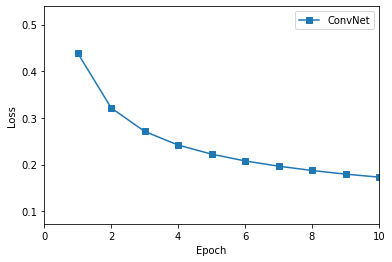

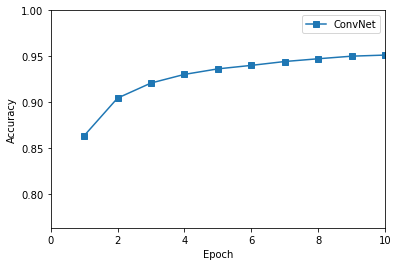

In [10]:
plot_loss_and_acc({'ConvNet': [conv_loss, conv_acc]})

### ~~You have finished homework3, congratulations!~~  

**Next, according to the requirements (4):**
### **You need to implement the Dropout layer and train the network again.**

In [11]:

size=7
drop_out=0.2


In [12]:
from layers import DropoutLayer


convNet = Network()


convNet.add(ConvLayer(1, 8, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ConvLayer(8, 16, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ReshapeLayer((batch_size, 16, 7, 7), (batch_size, 784)))
convNet.add(FCLayer(16* size* size, 128))
convNet.add(DropoutLayer(p=drop_out))
convNet.add(ReLULayer())
convNet.add(FCLayer(128, 10))


In [13]:
# Train
convNet.is_training = True
convNet, conv_loss, conv_acc = train(convNet, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][10]	 Batch [0][550]	 Training Loss 8.1149	 Accuracy 0.1700
Epoch [0][10]	 Batch [50][550]	 Training Loss 3.8134	 Accuracy 0.2233
Epoch [0][10]	 Batch [100][550]	 Training Loss 3.0816	 Accuracy 0.2902
Epoch [0][10]	 Batch [150][550]	 Training Loss 2.6302	 Accuracy 0.3432
Epoch [0][10]	 Batch [200][550]	 Training Loss 2.3414	 Accuracy 0.3861
Epoch [0][10]	 Batch [250][550]	 Training Loss 2.1352	 Accuracy 0.4223
Epoch [0][10]	 Batch [300][550]	 Training Loss 1.9698	 Accuracy 0.4551
Epoch [0][10]	 Batch [350][550]	 Training Loss 1.8452	 Accuracy 0.4811
Epoch [0][10]	 Batch [400][550]	 Training Loss 1.7454	 Accuracy 0.5027
Epoch [0][10]	 Batch [450][550]	 Training Loss 1.6602	 Accuracy 0.5220
Epoch [0][10]	 Batch [500][550]	 Training Loss 1.5905	 Accuracy 0.5378

Epoch [0]	 Average training loss 1.5263	 Average training accuracy 0.5537
Epoch [0]	 Average validation loss 0.7521	 Average validation accuracy 0.7584

Epoch [1][10]	 Batch [0][550]	 Training Loss 0.9395	 Accuracy 0.7400

In [14]:
# Test
convNet.is_training = False
test(convNet, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9064.



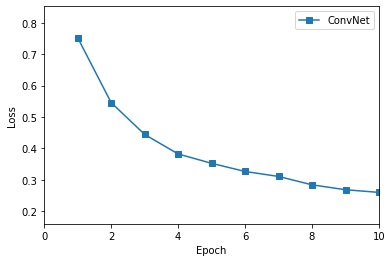

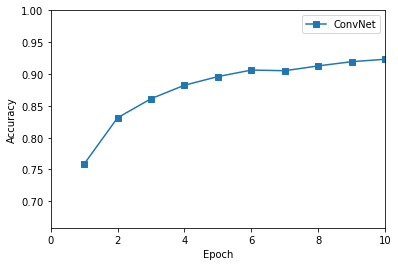

In [15]:
plot_loss_and_acc({'ConvNet': [conv_loss, conv_acc]})